In [1]:
### Initial design of drawing a coplanar waveguide resonator 


# automatic reloading of modules when they change

%load_ext autoreload
%autoreload 2


In [2]:
# Import statements

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight

In [3]:
# Instantiate QDesign class and initialise user interface

design = designs.DesignPlanar()
gui = MetalGUI(design)

In [4]:
# Allow overwriting

design.overwrite_enabled = True

In [5]:
otg1 = OpenToGround(design, 'open_to_ground1', options=dict(pos_x='0um', pos_y='0.9mm',
orientation='180'))
stg = ShortToGround(design, 'short_to_ground', options=dict(pos_x='0um', pos_y='-1.25mm',
orientation='270')) 

from collections import OrderedDict
jogs = OrderedDict()
jogs[0] = ["L", '125um']
#jogs[1] = ["L", '500um']
jogs[1] = ["R", '100um']
#jogs[3] = ["R", '125um']

rt_meander = RouteMeander(design, 'readout', Dict(
        total_length='4 mm',
        hfss_wire_bonds = True,
        fillet='90 um',
        lead = Dict(
        start_straight='0.2mm',
        end_straight='0mm',
        end_jogged_extension=jogs),
        pin_inputs=Dict(
            start_pin=Dict(component='short_to_ground', pin='short'),
            end_pin=Dict(component='open_to_ground1', pin='open')), ))

gui.rebuild()
gui.autoscale()


02:00PM 16s WARNING [check_lengths]: For path table, component=readout, key=trace has short segments that could cause issues with fillet. Values in (1-2) (19-21)  are index(es) in shapley geometry.
02:00PM 16s WARNING [check_lengths]: For path table, component=readout, key=cut has short segments that could cause issues with fillet. Values in (1-2) (19-21)  are index(es) in shapley geometry.
02:00PM 16s WARNING [check_lengths]: For path table, component=readout, key=trace has short segments that could cause issues with fillet. Values in (1-2) (19-21)  are index(es) in shapley geometry.
02:00PM 16s WARNING [check_lengths]: For path table, component=readout, key=cut has short segments that could cause issues with fillet. Values in (1-2) (19-21)  are index(es) in shapley geometry.


In [11]:
#Setup the launchpad location and orientation.
launch_options1 = dict(pos_x='-500um', pos_y='1050um', orientation='0')

lp = LaunchpadWirebondCoupled(design, 'P4_Q', options = launch_options1)

#Setup the OpenToGround location and orientation.
launch_options2 = dict(pos_x='0.75mm',  pos_y='1.05mm', orientation='180')

lp2 = LaunchpadWirebondCoupled(design, 'P5_Q', options = launch_options2)

#After the two QComponents are added to design, connect them with a RouteMeander.
meander_options = Dict(
       # total_length='0.25 mm',
        #fillet='4 um',
      #  lead = dict(start_straight='0um'),
        pin_inputs=Dict(
            start_pin=Dict(component=lp.name, pin='tie'),
            end_pin=Dict(component=lp2.name, pin='tie')), )

meander = RouteStraight(design, options=meander_options)
gui.rebuild()
gui.autoscale()

02:02PM 22s WARNING [check_lengths]: For path table, component=readout, key=trace has short segments that could cause issues with fillet. Values in (1-2) (19-21)  are index(es) in shapley geometry.
02:02PM 22s WARNING [check_lengths]: For path table, component=readout, key=cut has short segments that could cause issues with fillet. Values in (1-2) (19-21)  are index(es) in shapley geometry.
02:02PM 22s WARNING [add_pins_to_table]: Component: 15 and pin: tie are already in net_info with net_id 25
02:02PM 22s WARNING [connect_pins]: NetId was not added for 15, tie, 8, start and will not be added to components.
02:02PM 22s WARNING [add_pins_to_table]: Component: 16 and pin: tie are already in net_info with net_id 26
02:02PM 22s WARNING [connect_pins]: NetId was not added for 16, tie, 8, end and will not be added to components.
02:02PM 22s WARNING [add_pins_to_table]: Component: 15 and pin: tie are already in net_info with net_id 25
02:02PM 22s WARNING [connect_pins]: NetId was not added f

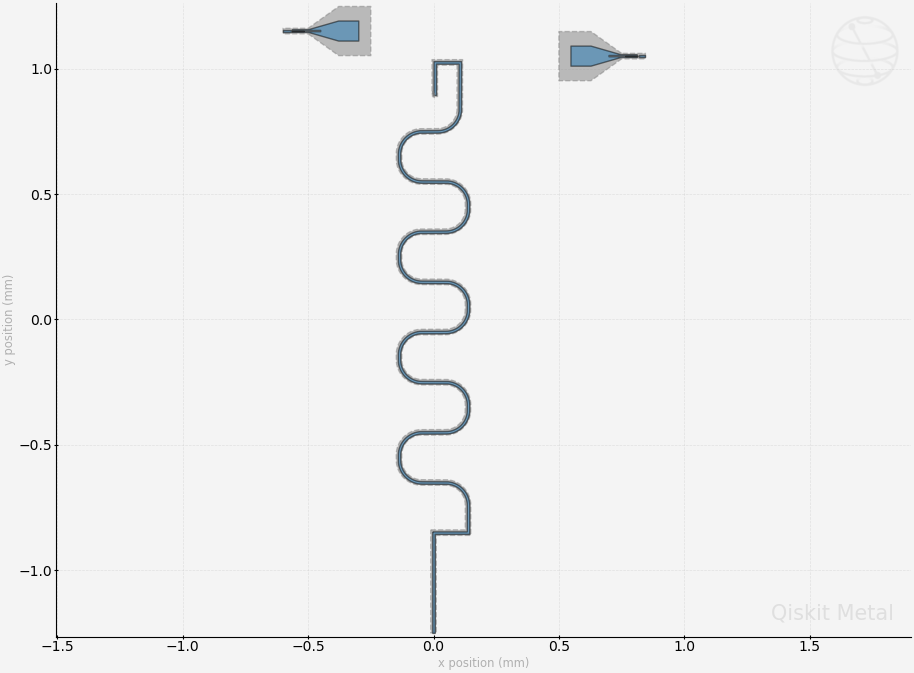

In [7]:
# Screenshot the canvas only as a .png formatted file.
gui.figure.savefig('shot.png')

from IPython.display import Image, display
_disp_ops = dict(width=500)
display(Image('shot.png', **_disp_ops))